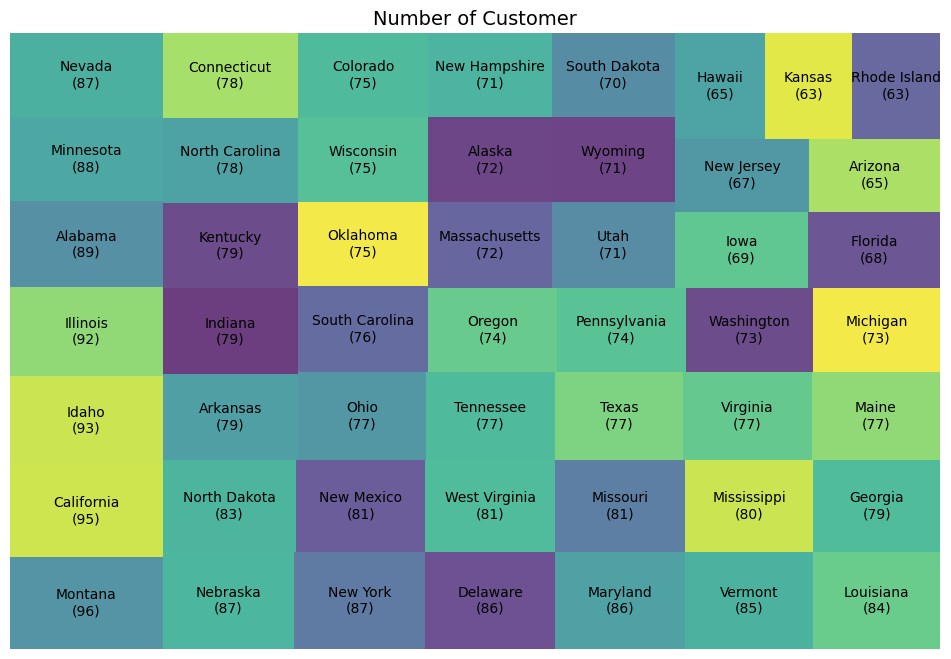

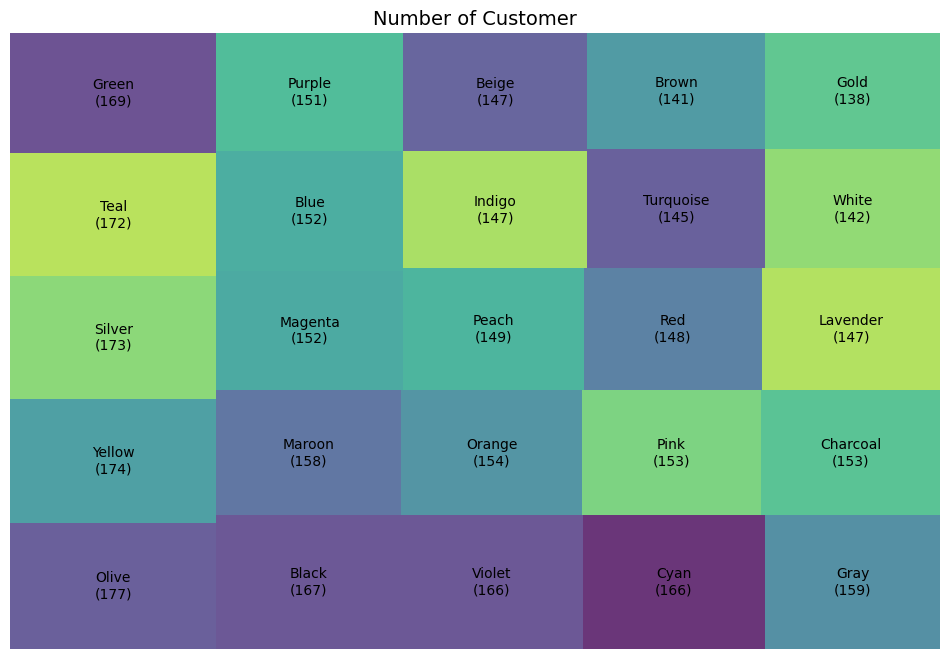

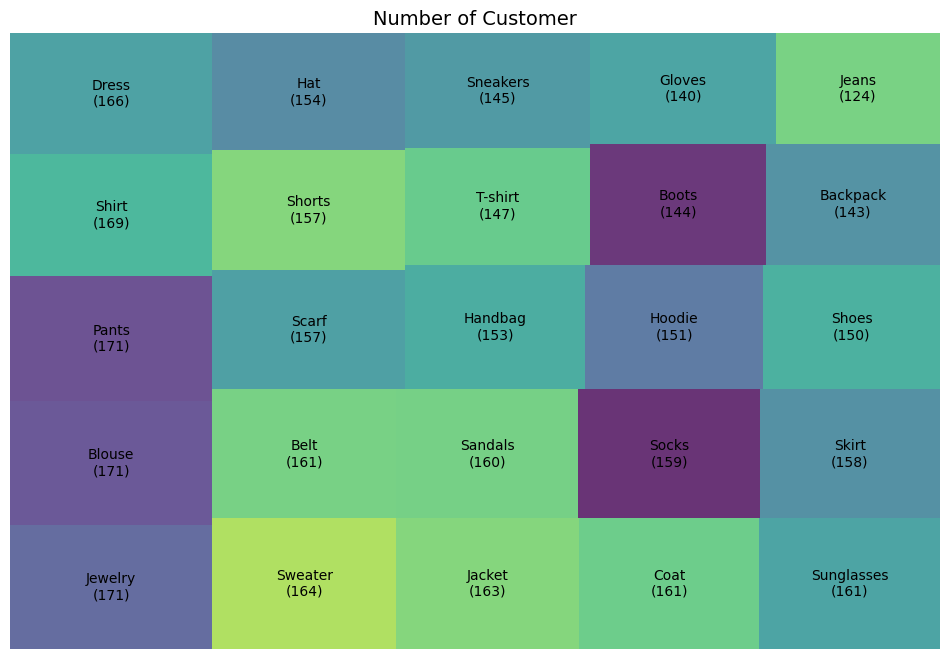

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Exploratory Data Analysis (EDA) - Tree Map Total Customer Per Context
# Dataset
data = pd.read_csv("shopping_trends.csv")

context_col = ['Location','Color','Item Purchased']

for dt in context_col:
    total_context = data.groupby(dt)['Customer ID'].count().reset_index()
    
    # Sort 
    total_context = total_context.sort_values(by='Customer ID', ascending=False)
    
    # Extract
    sizes = total_context['Customer ID']
    labels = total_context.apply(lambda x: f"{x[dt]}\n({x['Customer ID']})", axis=1)
    
    # Plot Tree Map
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8)
    plt.title("Number of Customer", fontsize=14)
    plt.axis('off')
    plt.show()

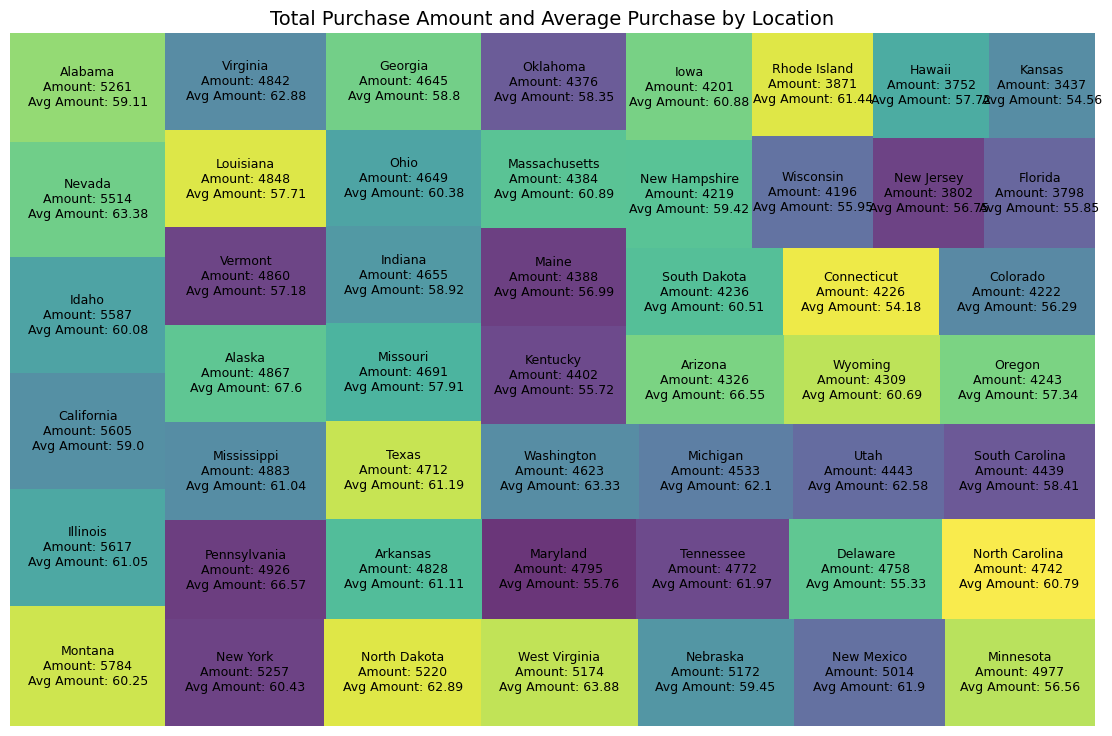

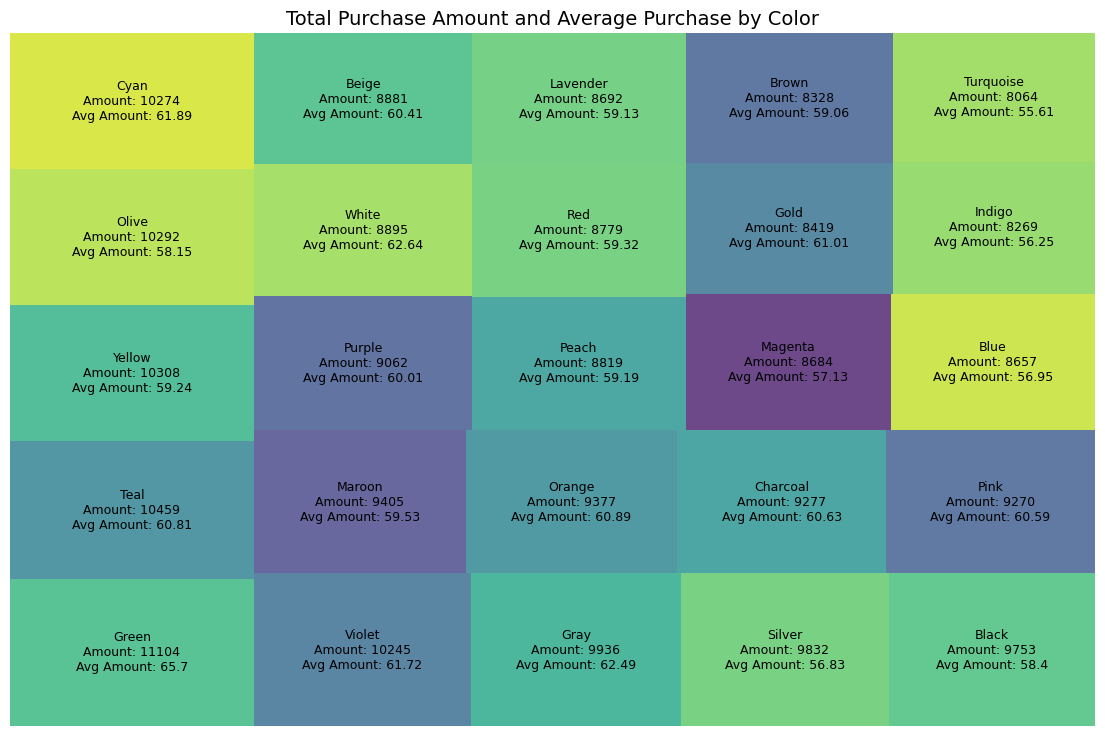

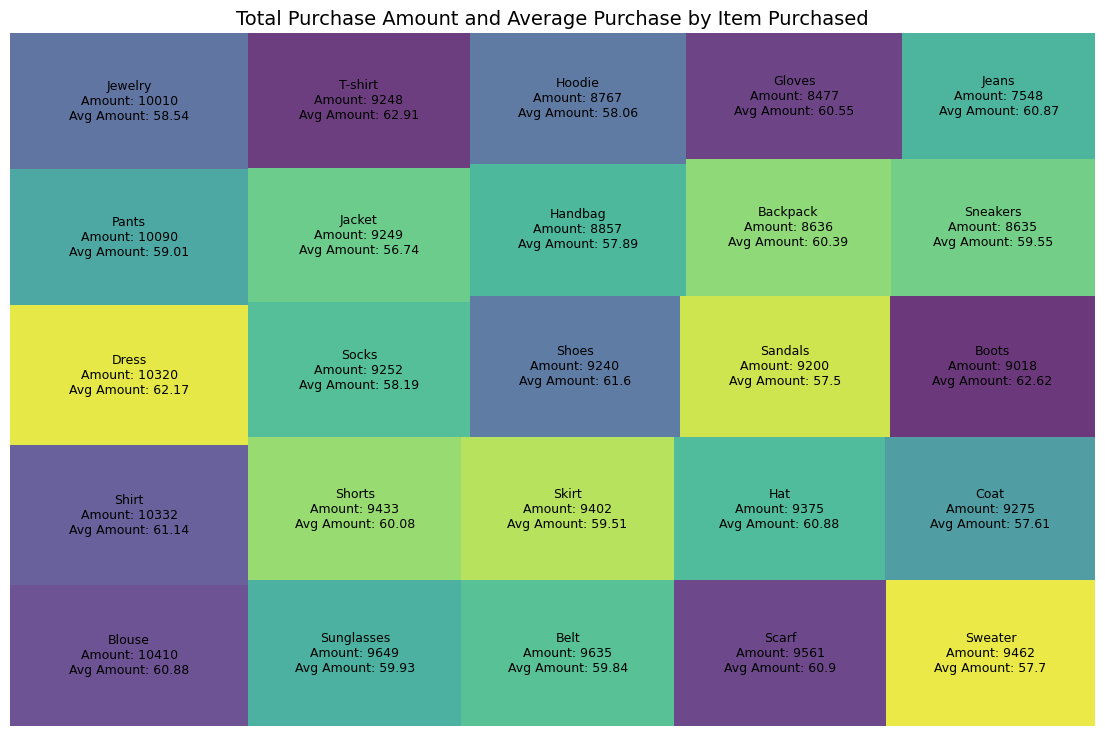

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Exploratory Data Analysis (EDA) - Tree Map Total Purchase & Average Amount Per Context
# Dataset
data = pd.read_csv("shopping_trends.csv")

# Context Columns
context_col = ['Location', 'Color', 'Item Purchased']

# Loop through each context column
for dt in context_col:
    # Calculate the sum of Purchase Amount per context
    total_context = data.groupby(dt)['Purchase Amount (USD)'].sum().reset_index()
    total_context.rename(columns={'Purchase Amount (USD)': 'Total Purchase Amount'}, inplace=True)
    
    # Calculate the count of purchases per context (number of purchases)
    total_purchase = data.groupby(dt)['Purchase Amount (USD)'].count().reset_index()
    total_purchase.rename(columns={'Purchase Amount (USD)': 'Number of Purchases'}, inplace=True)
    
    # Merge both datasets on the context column (e.g., Location, Color, Item Purchased)
    merged_data = total_context.merge(total_purchase, on=dt)
    
    # Calculate average purchase amount (Total Purchase Amount divided by Number of Purchases)
    merged_data['Avg Purchase Amount'] = (merged_data['Total Purchase Amount'] / merged_data['Number of Purchases']).round(2)
    
    # Sort by Total Purchase Amount in descending order
    merged_data = merged_data.sort_values(by='Total Purchase Amount', ascending=False)
    
    # Extract sizes and labels for the Tree Map
    sizes = merged_data['Total Purchase Amount']
    labels = merged_data.apply(lambda x: f"{x[dt]}\nAmount: {x['Total Purchase Amount']}\nAvg Amount: {x['Avg Purchase Amount']}", axis=1)
    
    # Plot Tree Map
    plt.figure(figsize=(14, 9))
    ax = squarify.plot(sizes=sizes, label=labels, alpha=0.8)    
    for label in ax.texts:
        label.set_fontsize(9)
    plt.title(f"Total Purchase Amount and Average Purchase by {dt}", fontsize=14)
    plt.axis('off') 
    plt.show()